In [66]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [68]:
df = pd.read_csv('./bank.csv')

In [69]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [70]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [71]:
df_original = df.copy(deep=True)

In [72]:
df.drop('contact', axis=1, inplace=True)
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

      day month  duration  campaign  pdays  previous poutcome subscribed  
1995   16   sep       327         2     -1         0      NaN        yes  
1996   16   sep      1334         2     -1         0      NaN        yes  
1997   17   sep       231         1     -1         0      NaN        yes  
1998   20   sep       185         1     -1         0      NaN        yes  
1999   22   sep       208         2     -1         0      NaN        yes

<AxesSubplot:xlabel='education,housing'>

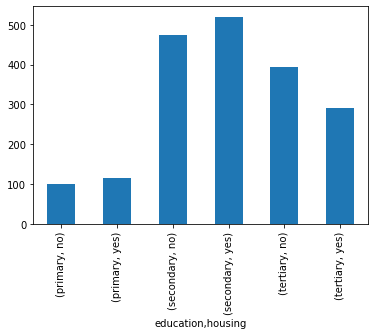

In [73]:
df.groupby(by=['education', 'housing']).size().plot(kind='bar')

In [74]:
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['education']])

df[['education']] = impute_mode.transform(df[['education']])

In [75]:
scale_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary":3,
    
}

df['education'] = df['education'].replace(scale_mapper)
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single          2      no     2785      no   no   
1996  28.0        admin.   single          2      no      127      no   no   
1997  81.0       retired  married          1      no     1154      no   no   
1998  46.0      services  married          1      no     4343     yes   no   
1999  40.0  entrepreneur  married          2      no     6403      no   no   

      day month  duration  campaign  pdays  previous poutcome subscribed  
1995   16   sep       327         2     -1         0      NaN        yes  
1996   16   sep      1334         2     -1         0      NaN        yes  
1997   17   sep       231         1     -1         0      NaN        yes  
1998   20   sep       185         1     -1         0      NaN        yes  
1999   22   sep       208         2     -1         0      NaN        yes

In [76]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'marital', 'housing', 'loan', 'default'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

age  education  balance  day month  duration  campaign  pdays  \
1995  20.0          2     2785   16   sep       327         2     -1   
1996  28.0          2      127   16   sep      1334         2     -1   
1997  81.0          1     1154   17   sep       231         1     -1   
1998  46.0          1     4343   20   sep       185         1     -1   
1999  40.0          2     6403   22   sep       208         2     -1   

      previous poutcome  ... job_nan  marital_married  marital_single  \
1995         0      NaN  ...       0                0               1   
1996         0      NaN  ...       0                0               1   
1997         0      NaN  ...       0                1               0   
1998         0      NaN  ...       0                1               0   
1999         0      NaN  ...       0                1               0   

      marital_nan  housing_yes  housing_nan  loan_yes  loan_nan  default_yes  \
1995            0            0            0         0         0            0   
1996            0            0            0         0         0            0   
1997            0            0            0         0         0            0   
1998            0            1            0         0         0            0   
1999            0            0            0         0         0            0   

      default_nan  
1995            0  
1996            0  
1997            0  
1998            0  
1999            0  

[5 rows x 31 columns]

In [78]:
#filling in missing data for age
df['age'].fillna(df['age'].mean(), inplace=True)
df.tail()

age  education  balance  day month  duration  campaign  pdays  \
1995  20.0          2     2785   16   sep       327         2     -1   
1996  28.0          2      127   16   sep      1334         2     -1   
1997  81.0          1     1154   17   sep       231         1     -1   
1998  46.0          1     4343   20   sep       185         1     -1   
1999  40.0          2     6403   22   sep       208         2     -1   

      previous poutcome  ... job_nan  marital_married  marital_single  \
1995         0      NaN  ...       0                0               1   
1996         0      NaN  ...       0                0               1   
1997         0      NaN  ...       0                1               0   
1998         0      NaN  ...       0                1               0   
1999         0      NaN  ...       0                1               0   

      marital_nan  housing_yes  housing_nan  loan_yes  loan_nan  default_yes  \
1995            0            0            0         0         0            0   
1996            0            0            0         0         0            0   
1997            0            0            0         0         0            0   
1998            0            1            0         0         0            0   
1999            0            0            0         0         0            0   

      default_nan  
1995            0  
1996            0  
1997            0  
1998            0  
1999            0  

[5 rows x 31 columns]

In [79]:
df.isna().sum()

age                    0
education              0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome             454
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
housing_yes            0
housing_nan            0
loan_yes               0
loan_nan               0
default_yes            0
default_nan            0
dtype: int64

In [131]:
#filling in missing data for poutcome

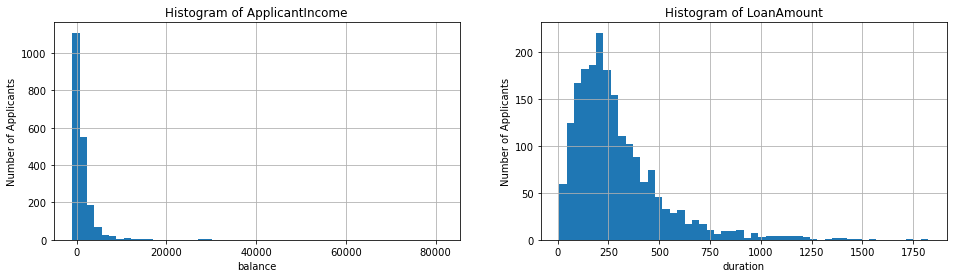

In [132]:
#outliers for balance 
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of ApplicantIncome")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=50)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of LoanAmount")
ax3.set_xlabel('duration')
ax3.set_ylabel('Number of Applicants')
df['duration'].hist(bins=50)

plt.show()

In [133]:
df[['balance', 'duration']].min()

balance    -980
duration      7
dtype: int64

In [136]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+1.16)
df['duration'] = np.log(df['duration']+1.65)

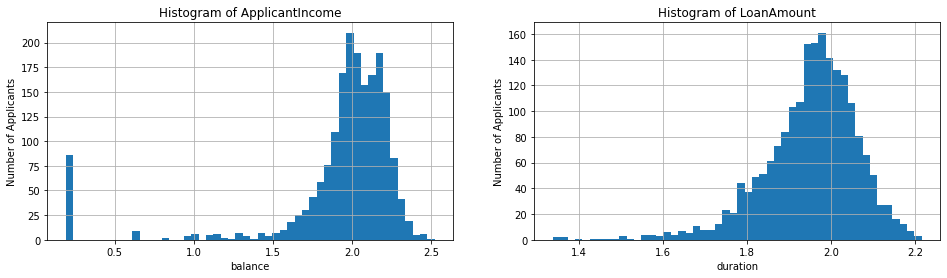

In [137]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of ApplicantIncome")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=50)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of LoanAmount")
ax3.set_xlabel('duration')
ax3.set_ylabel('Number of Applicants')
df['duration'].hist(bins=50)

plt.show()